In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 1.5MB/s 
     |████████████████████████████████| 92kB 10.6MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0


# Import

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import pandas as pd
import json

from calendar import monthrange

# Define path

In [ ]:
BASE_PATH = os.path.join('drive','MyDrive','MLBDproject')
COUNTRIES = [('FRA', 'Paris'), ('FRA', 'Paris2'), ('DEU', 'Berlin'), ('GBR', 'London'), ('ESP', 'Madrid'), ('ITA', 'Milan')]

# Compute light intensity and covid plots

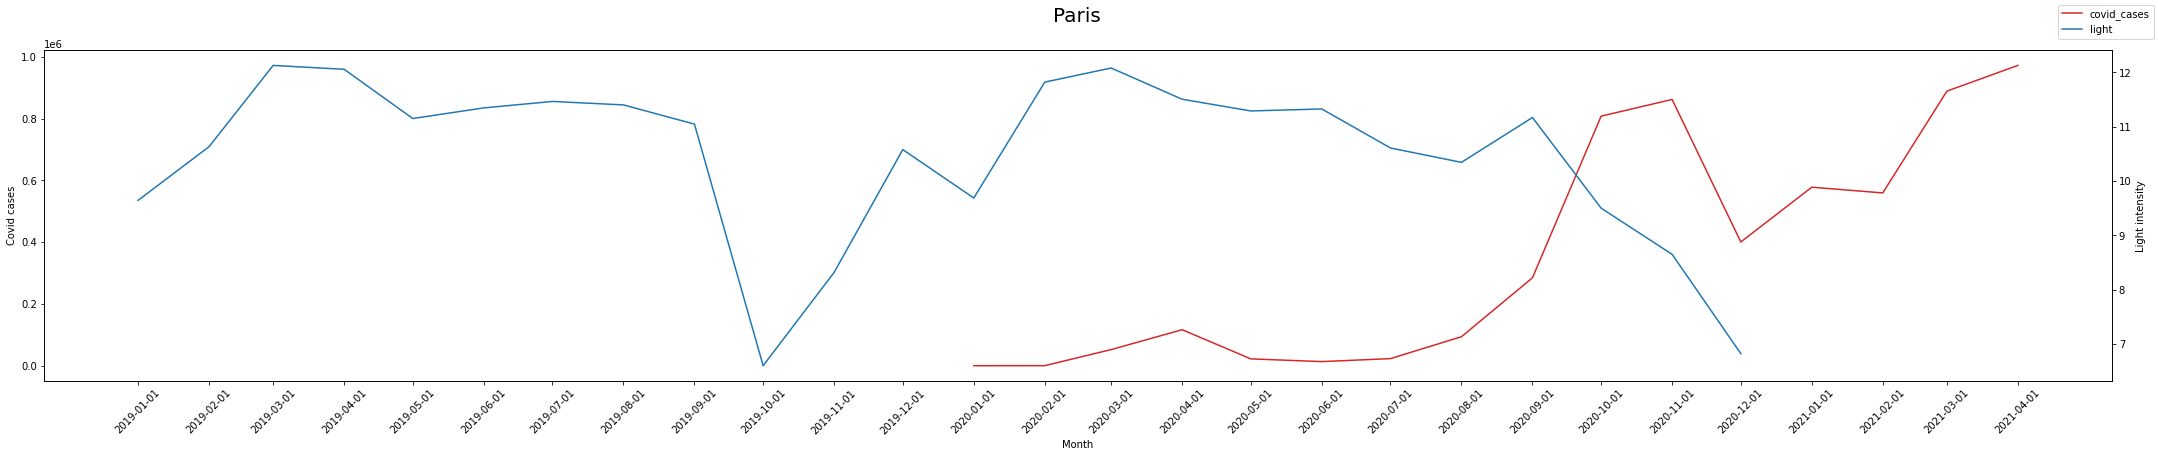

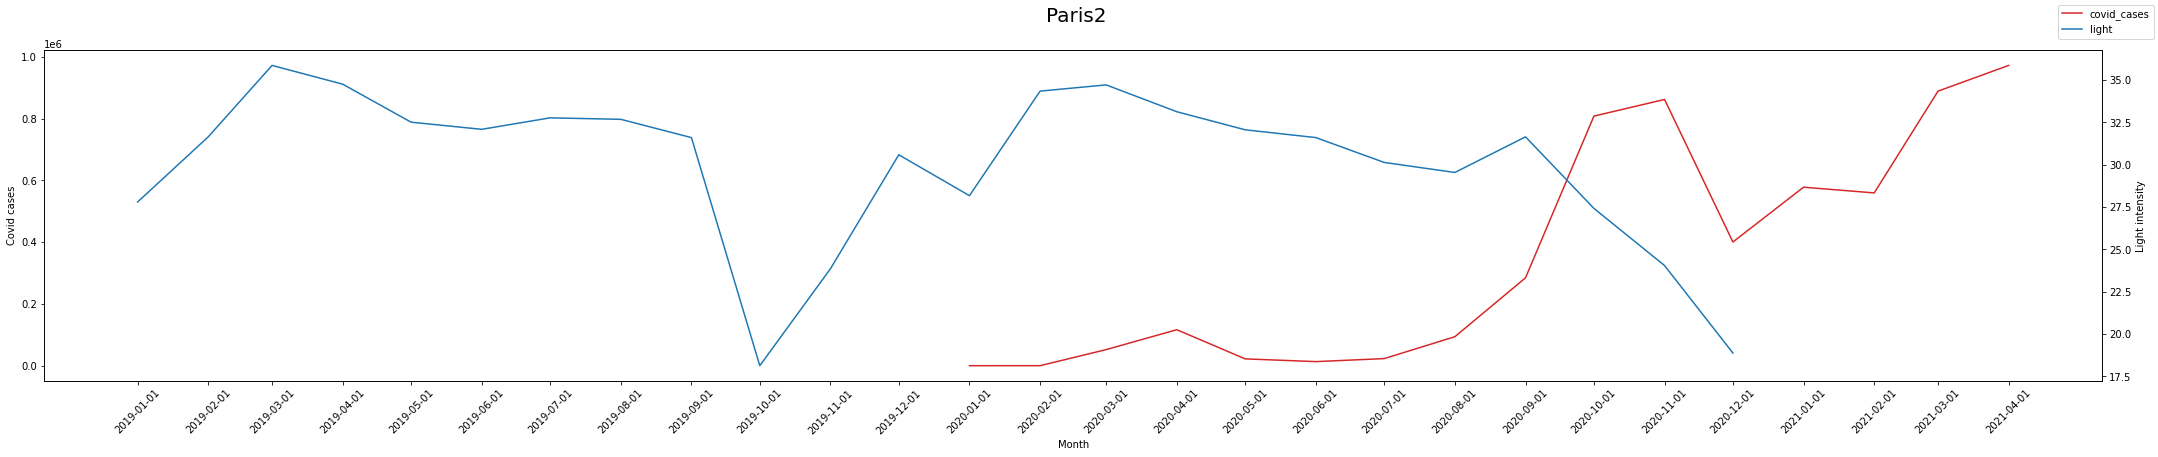

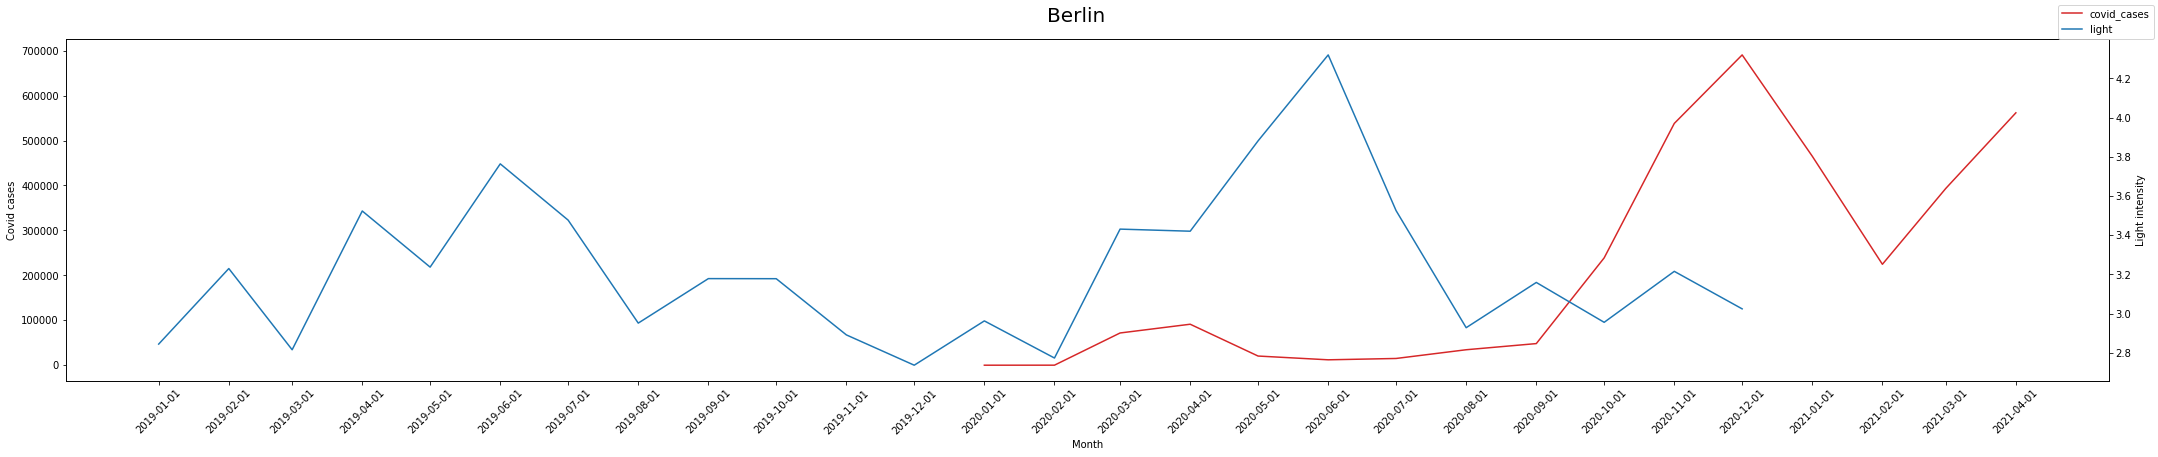

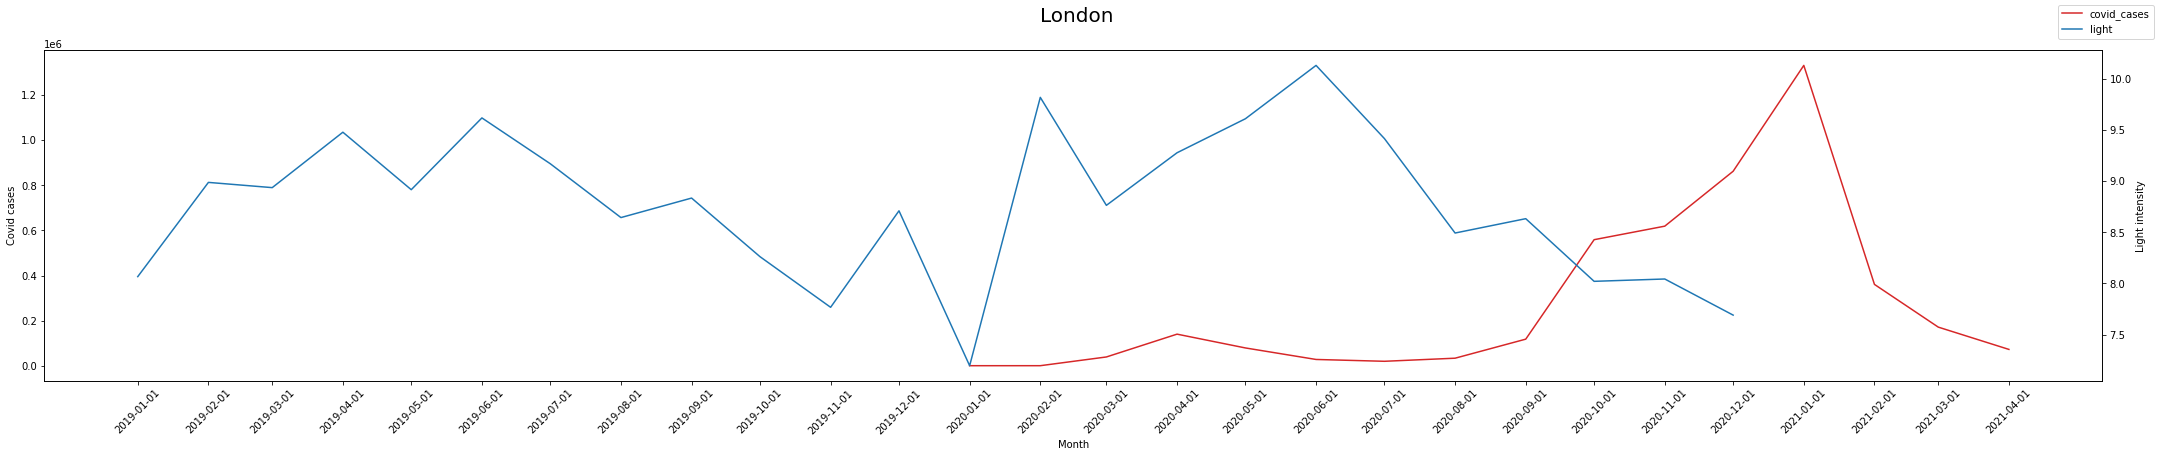

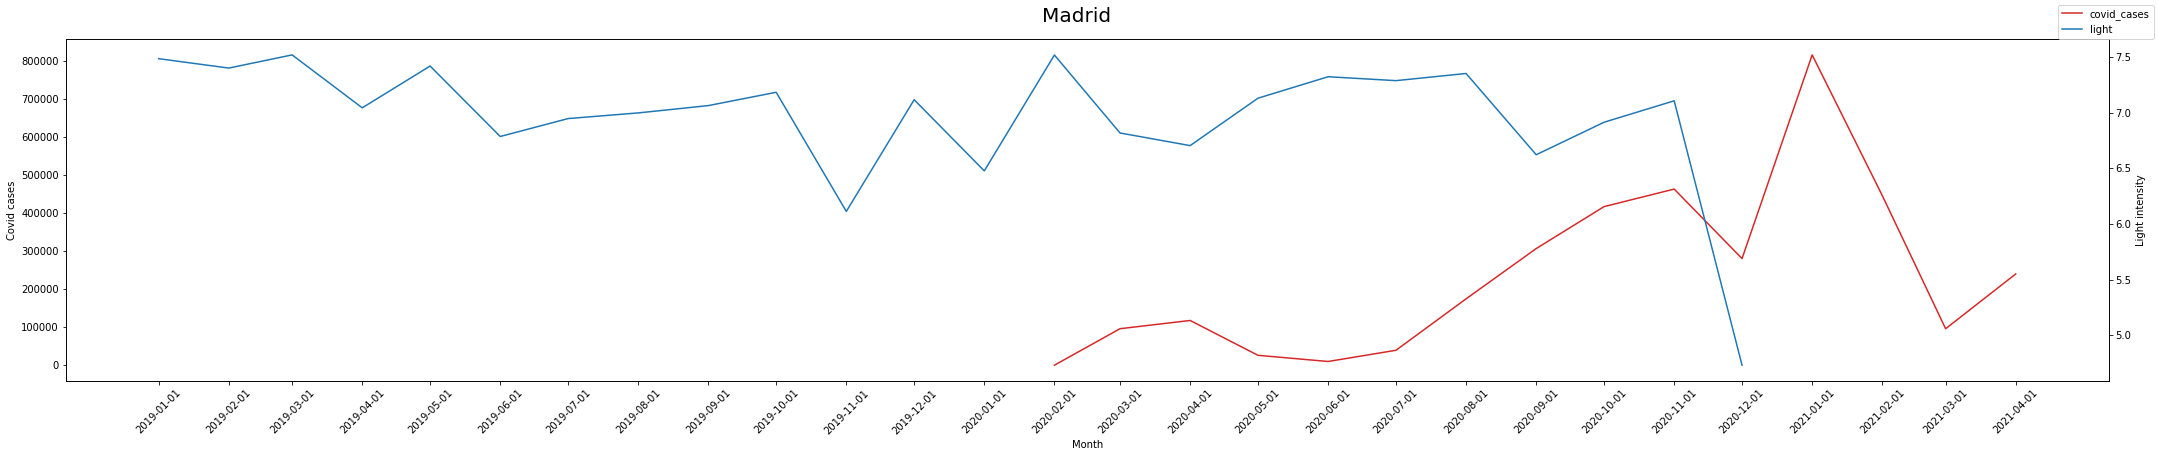

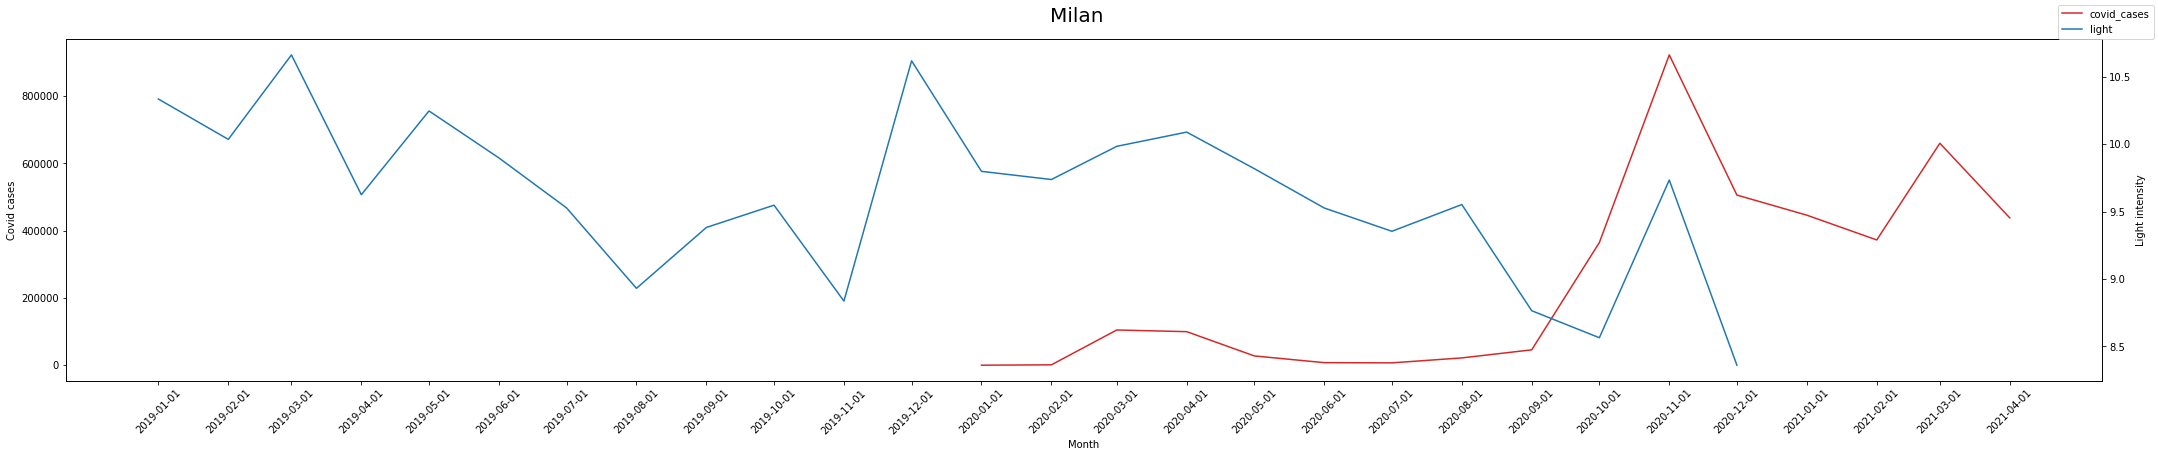

In [ ]:
with open(os.path.join('drive','MyDrive','MLBDproject','covid.json')) as json_file:
  data = json.load(json_file)

  for code, city in COUNTRIES:
    cases_month = {}
    acc = 0.0

    for item in data[code]['data']:
      year, month, day = int(item['date'].split('-')[0]), int(item['date'].split('-')[1]), int(item['date'].split('-')[2])
      acc += item['new_cases']
      if monthrange(year, month)[1] == day:
        cases_month[datetime.date(year, month, 1)] = acc
        acc=0.0
    
    df_covid = pd.DataFrame.from_dict(cases_month, orient='index',columns=['covid_cases'])
    df_covid.index.name = 'date'

    dict_img = {}
    for path in os.listdir(os.path.join(BASE_PATH, city)):
      img = rasterio.open(os.path.join(BASE_PATH, city, path)).read()[0].flatten()
      year, month = int(path.split("-")[0]), int(path.split("-")[1].split(".")[0])
      key = datetime.date(year, month, 1)

      dict_img[key] = np.mean(img)

    df_light = pd.DataFrame()
    df_light['light'] = dict_img.values()
    df_light['date'] = dict_img.keys()
    df_light = df_light.set_index(df_light['date'], drop=True)
    del df_light['date']
    df_light = df_light.sort_index()

    concat_df = pd.concat([df_light, df_covid],axis=1)

    fig, ax1 = plt.subplots(1,1,figsize=(30,6))
    concat_df['covid_cases'].plot(ax=ax1, color='tab:red')
    ax1.set_xticks(concat_df.index)
    ax1.set_xticklabels(concat_df.index, rotation=45)
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Covid cases')
    ax1.set_xticks(concat_df.index)

    ax2 = ax1.twinx() 
    concat_df['light'].plot(ax=ax2, color='tab:blue')
    ax2.tick_params(axis='y')
    ax2.set_ylabel('Light intensity')
    ax2.set_xticks(concat_df.index)

    fig.legend()
    fig.suptitle(city, fontsize=20, y=1.05)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

# Display satelite images

In [ ]:
london2019 = rasterio.open("drive/MyDrive/MLBDproject/London2019.tif")
london2019 = london2019.read()[0]

london2020 = rasterio.open("drive/MyDrive/MLBDproject/London2020.tif")
london2020 = london2020.read()[0]

paris2019 = rasterio.open("drive/MyDrive/MLBDproject/Paris2019.tif")
paris2019 = paris2019.read()[0]

paris2020 = rasterio.open("drive/MyDrive/MLBDproject/Paris2020.tif")
paris2020 = paris2020.read()[0]

In [ ]:
paris_res = np.abs(paris2020 - paris2019)

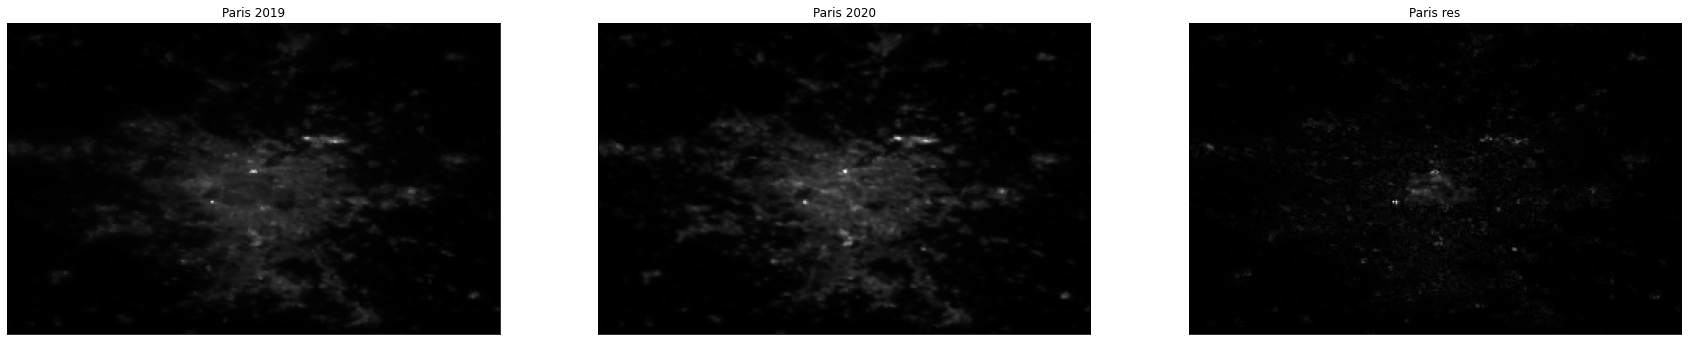

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(30,20))

axes[0].imshow(paris2019,  cmap='gray')
axes[0].set_title("Paris 2019")
axes[0].tick_params(labelbottom=False,bottom=False,labelleft=False,left=False)

axes[1].imshow(paris2020,  cmap='gray')
axes[1].set_title("Paris 2020")
axes[1].tick_params(labelbottom=False,bottom=False,labelleft=False,left=False)

axes[2].imshow(paris_res,  cmap='gray')
axes[2].set_title("Paris res")
axes[2].tick_params(labelbottom=False,bottom=False,labelleft=False,left=False)

In [ ]:
london_res = np.abs(london2020 - london2019)

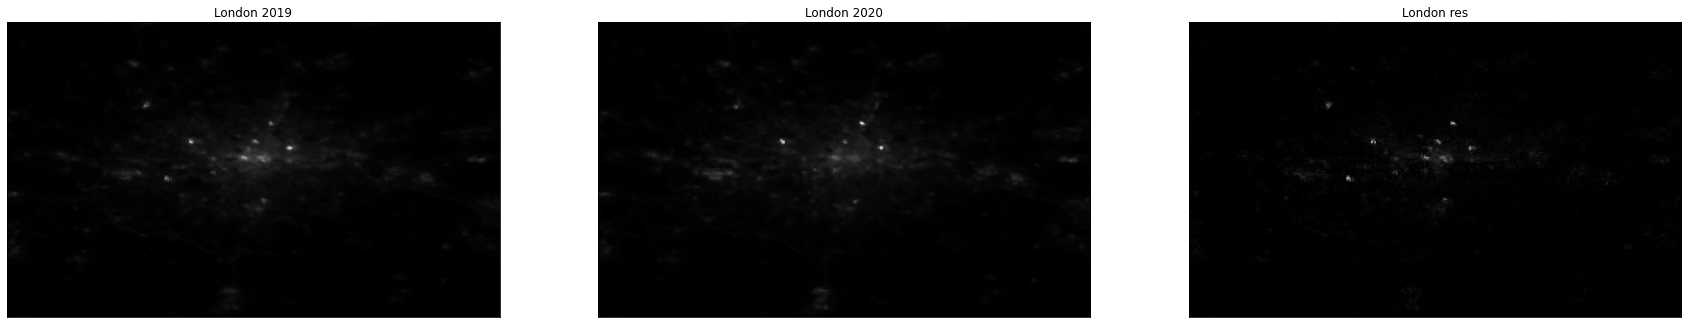

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(30,20))

axes[0].imshow(london2019,  cmap='gray')
axes[0].set_title("London 2019")
axes[0].tick_params(labelbottom=False,bottom=False,labelleft=False,left=False)

axes[1].imshow(london2020,  cmap='gray')
axes[1].set_title("London 2020")
axes[1].tick_params(labelbottom=False,bottom=False,labelleft=False,left=False)

axes[2].imshow(london_res,  cmap='gray')
axes[2].set_title("London res")
axes[2].tick_params(labelbottom=False,bottom=False,labelleft=False,left=False)

<BarContainer object of 2 artists>

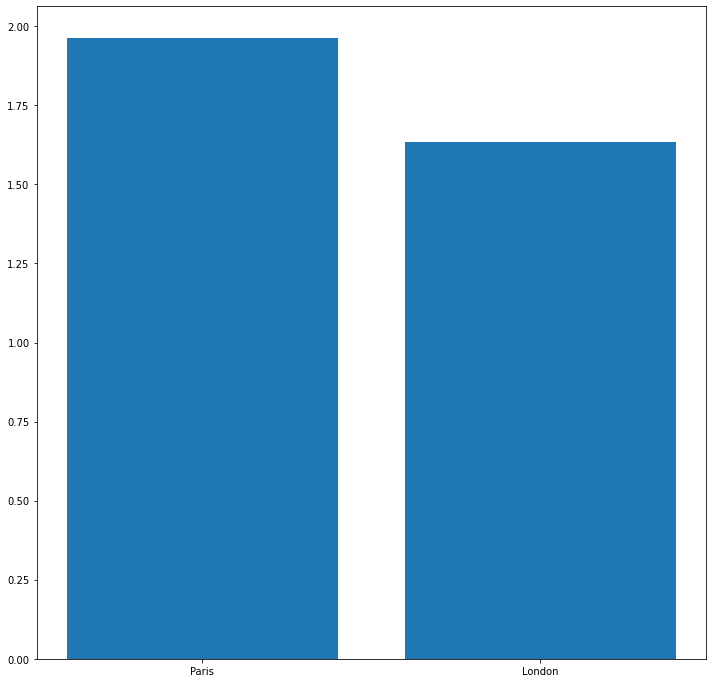

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.bar(["Paris", "London"], [np.mean(paris_res), np.mean(london_res)])